# Basic

## Values and variables

In [1]:
print(2^10) #comment

1024

In [2]:
?cos #help

search: cos cosh cosd cosc cospi acos acosh acosd sincos const close isconst



```
cos(x)
```

Compute cosine of `x`, where `x` is in radians.

---

```
cos(A::AbstractMatrix)
```

Compute the matrix cosine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the cosine. Otherwise, the cosine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> cos(fill(1.0, (2,2)))
2×2 Array{Float64,2}:
  0.291927  -0.708073
 -0.708073   0.291927
```


In [3]:
println("string " * "concatenation ±") #± entered by \pm<tab>
println(!true)        #booleans
println(true && true)
println(true || false)
println(3/2)
println(2.0===2)
println(4 == 2*2 )
println(7&2)   #bitwise and

string concatenation ±
false
true
true
1.5
false
true
2


In [37]:
dict = Dict("year"=>2019, "month"=>11)
println(dict["month"])
println(dict.count)

11
2


In [49]:
println(typeof("H")," ",typeof('H'))

String Char
1.5
false


In [75]:
a, b = 3,5

(3, 5)

In [96]:
print("in-string evalution $(typeof(a)) like python")

in-string evalution Int64 like python

## Arrays and Types

In [57]:
row = [1,2.,3]
col = [4;5;6]
println(row[1])  #1-based

1.0


In [12]:
a=Array{Int64}(undef,3,3)  # 3 x 3 (2 dimensions)
println(a)
println(a[3,3])
a[1,1]=5.0  # ok -- can be converted to an Int64
# a[1,2]=5.3  #err

[4456710720 4456710720 4461064048; 0 0 0; 4456775704 4456775704 4456775704]
4456775704


5.0

In [13]:
ab=Array{Real}(undef,size(a))  # abstract type; size() function outputs tuple of dimensions
println(typeof(ab))
println(ab)                # abstract type init -- undef
ab[1,1]=5
ab[1,2]=5.3
println(typeof(ab[1,1]))
println(typeof(ab[1,2]))

Array{Real,2}
Real[#undef #undef #undef; #undef #undef #undef; #undef #undef #undef]
Int64
Float64


## functions / user-defined functions

In [83]:
#math functions
println(cos(0.2))
println(log(0.2))
println(log(Complex(-0.2)))
println(abs(-0.2))
println(abs(3+4im))

0.9800665778412416
-1.6094379124341003
-1.6094379124341003 + 3.141592653589793im
0.2
5.0


In [4]:
?muladd

search: muladd



```
muladd(x, y, z)
```

Combined multiply-add: computes `x*y+z`, but allowing the add and multiply to be merged with each other or with surrounding operations for performance. For example, this may be implemented as an [`fma`](@ref) if the hardware supports it efficiently. The result can be different on different machines and can also be different on the same machine due to constant propagation or other optimizations. See [`fma`](@ref).

# Examples

```jldoctest
julia> muladd(3, 2, 1)
7

julia> 3 * 2 + 1
7
```


In [9]:
a = Array{Any}(undef,4)
fill!(a,'x')   #function with ! (by convention) modifies the argument
println(a)

Any['x', 'x', 'x', 'x']


In [28]:
using Distributions
xs = rand(Distributions.Normal(0,1),100)
Onedp = round.(xs,digits=1)                       # '.' indicates element-wise
ToInt = round.(Int,xs);

In [88]:
methods(cos)   #check all possible signatures

# 12 methods for generic function "cos":
[1] cos(x::BigFloat) in Base.MPFR at mpfr.jl:743
[2] cos(::Missing) in Base.Math at math.jl:1072
[3] cos(a::Complex{Float16}) in Base.Math at math.jl:1020
[4] cos(a::Float16) in Base.Math at math.jl:1019
[5] cos(z::Complex{T}) where T in Base at complex.jl:814
[6] cos(x::T) where T<:Union{Float32, Float64} in Base.Math at special/trig.jl:100
[7] cos(x::Real) in Base.Math at special/trig.jl:124
[8] cos(A::LinearAlgebra.Hermitian{#s616,S} where S<:(AbstractArray{#s617,2} where #s617<:#s616) where #s616<:Complex) in LinearAlgebra at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/symmetric.jl:759
[9] cos(A::Union{LinearAlgebra.Hermitian{#s617,S}, LinearAlgebra.Symmetric{#s617,S}} where S where #s617<:Real) in LinearAlgebra at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/symmetric.jl:755
[10] cos(D::LinearAlgebra.Diagonal) in LinearAlgebra at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/diagonal.jl:468
[11] cos(A::AbstractArray{#s617,2} where #s617<:Real) in LinearAlgebra at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/dense.jl:753
[12] cos(A::AbstractArray{#s617,2} where #s617<:Complex) in LinearAlgebra at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/dense.jl:760

In [97]:
fn(x) = 2*x      #one-line definition
fn(x,y) = 2*x+y  #different signatures
print(fn(2,3))
methods(fn)

7

# 2 methods for generic function "fn":
[1] fn(x) in Main at In[97]:1
[2] fn(x, y) in Main at In[97]:2

In [101]:
fnchk(x::Float64) = cos(x)  #force Julia to check type
fnchk(1)

MethodError: MethodError: no method matching fnchk(::Int64)
Closest candidates are:
  fnchk(!Matched::Float64) at In[101]:1

In [120]:
#multiline
function factorial(n)
    r=1
    for v =1:n   # can also: for x in [1,2,3]
        r*=v
    end
    return r     # can remove return -- last value will then be returned
end
factorial(10)

3628800

In [126]:
#recursive?
function factorial(n)
    if n<2 n
    else   n*factorial(n-1)
    end
end
factorial(10)

3628800

## Packages

In [ ]:
using DelimitedFiles  #reading csv
result = DelimitedFiles.readdlm("a.csv", '.')

In [111]:
using Dates #handling dates
Dates.DateTime("2019 11 15","y m d")
Dates.datetime2rata(Dates.DateTime("2019 11 15","y m d")) #https://en.wikipedia.org/wiki/Rata_Die

737378

In [6]:
# import Pkg
# Pkg.add("Plots")
using Plots
gr()          #"GR" backend

Plots.GRBackend()

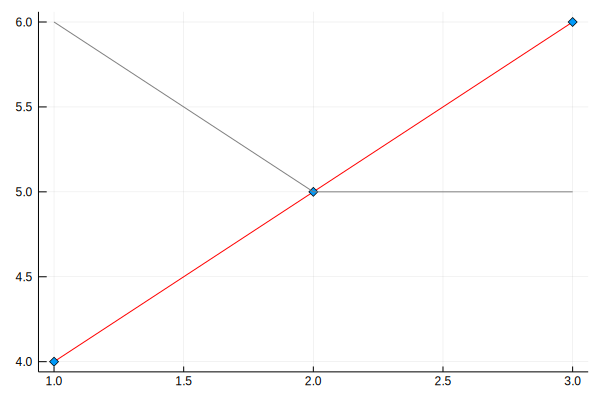

In [17]:
plot([1,2,3],[4,5,6],marker=:diamond,line=(:path,"red"),legend=false)
plot!([1,2,3],[6,5,5],line=(:path,"gray"))   #use plot! instead of plot to overlay